<a href="https://colab.research.google.com/github/A01795331/estefania/blob/main/Actividad7PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: José Antonio Hernández Hernández
*   MATRÍCULA: A01381334
*   NOMBRE: Estefanía Amaya Rojas
*   MATRÍCULA: A01795331
*   NOMBRE: Diego Alí López Álvarez
*   MATRÍCULA: A00817381
*   NOMBRE: Carlos Mariano Ramírez Amaya
*   MATRÍCULA: A01795036Elemento de lista


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/CAyD/ActiveClass7"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

In [ ]:
def explore_dataframe(df):
    # Información general sobre el DataFrame
    print("Información general del DataFrame:")
    print(df.info())
    print("\n" + "-"*50 + "\n")

    # Primeras filas del DataFrame
    print("Primeras filas del DataFrame:")
    print(df.head())
    print("\n" + "-"*50 + "\n")

    # Nombres de las columnas
    print("Nombres de las columnas:")
    print(df.columns)
    print("\n" + "-"*50 + "\n")

    # Tamaño del DataFrame
    print("Tamaño del DataFrame (filas, columnas):")
    print(df.shape)
    print("\n" + "-"*50 + "\n")

    # Número de valores únicos en cada columna
    print("Número de valores únicos por columna:")
    print(df.nunique())
    print("\n" + "-"*50 + "\n")

    # Verificación de valores faltantes en cada columna
    print("Cantidad de valores faltantes por columna:")
    print(df.isnull().sum())
    print("\n" + "-"*50 + "\n")

# Llamada a la función para explorar cereals_df
explore_dataframe(cereals_df)

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB
None

--------------------------------------------------

Primeras filas del DataFrame:
          

# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
# Obtener estadísticas descriptivas para todas las columnas
stats = cereals_df.describe(include='all')

print(stats)

             name  mfr type    calories    protein        fat      sodium  \
count          77   77   77   77.000000  77.000000  77.000000   77.000000   
unique         77    7    2         NaN        NaN        NaN         NaN   
top     100%_Bran    K    C         NaN        NaN        NaN         NaN   
freq            1   23   74         NaN        NaN        NaN         NaN   
mean          NaN  NaN  NaN  106.883117   2.545455   1.012987  159.675325   
std           NaN  NaN  NaN   19.484119   1.094790   1.006473   83.832295   
min           NaN  NaN  NaN   50.000000   1.000000   0.000000    0.000000   
25%           NaN  NaN  NaN  100.000000   2.000000   0.000000  130.000000   
50%           NaN  NaN  NaN  110.000000   3.000000   1.000000  180.000000   
75%           NaN  NaN  NaN  110.000000   3.000000   2.000000  210.000000   
max           NaN  NaN  NaN  160.000000   6.000000   5.000000  320.000000   

            fiber      carbo     sugars      potass    vitamins      shelf 

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

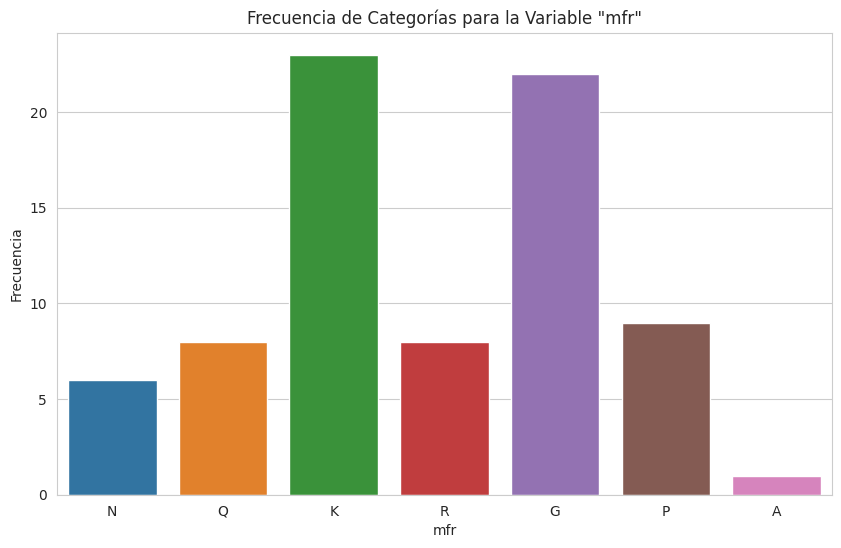

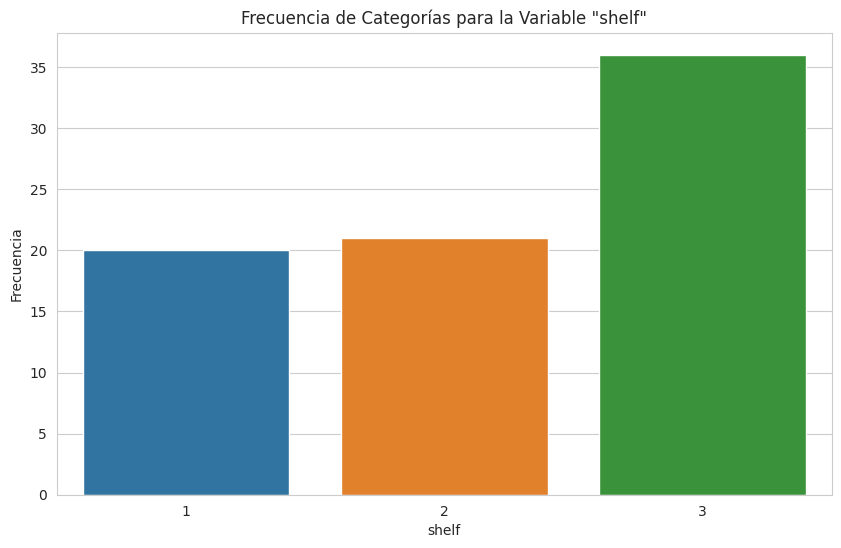

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo de Seaborn
sns.set_style("whitegrid")

# Gráfico para la variable 'mfr'
plt.figure(figsize=(10, 6))
sns.countplot(data=cereals_df, x='mfr')
plt.title('Frecuencia de Categorías para la Variable "mfr"')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico para la variable 'shelf'
plt.figure(figsize=(10, 6))
sns.countplot(data=cereals_df, x='shelf')
plt.title('Frecuencia de Categorías para la Variable "shelf"')
plt.ylabel('Frecuencia')
plt.show()


2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

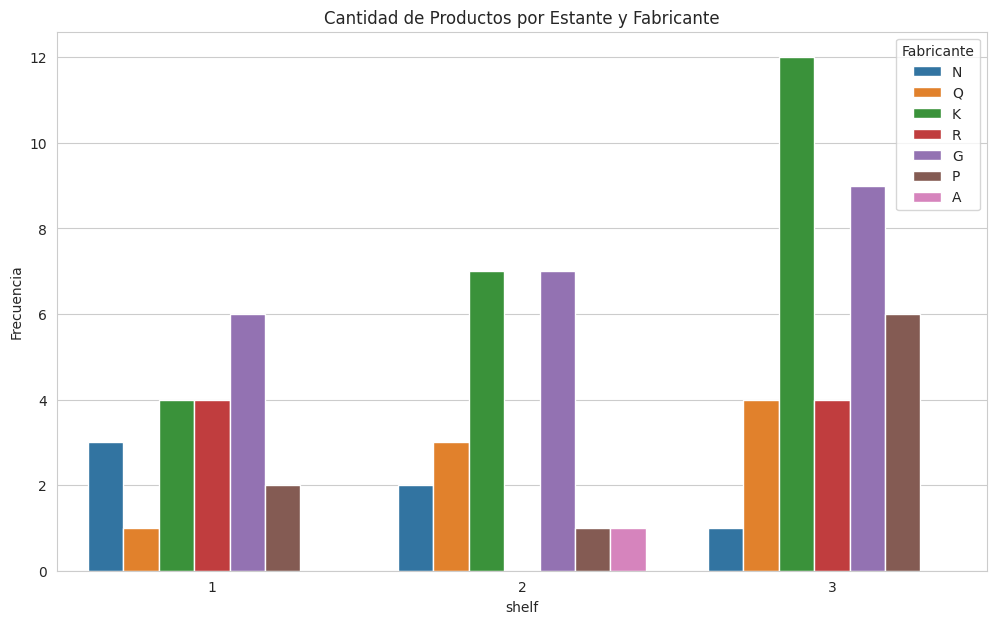

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo de Seaborn
sns.set_style("whitegrid")

# Gráfico agrupado para observar cuántos productos tiene cada fabricante en cada estante
plt.figure(figsize=(12, 7))
sns.countplot(data=cereals_df, x='shelf', hue='mfr')
plt.title('Cantidad de Productos por Estante y Fabricante')
plt.ylabel('Frecuencia')
plt.legend(title='Fabricante', loc='upper right')
plt.show()


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

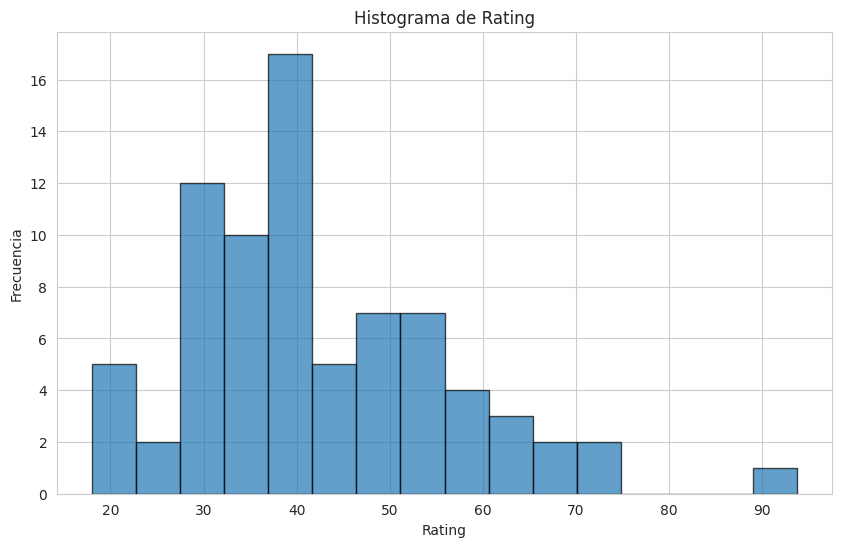

El rango más frecuente de 'rating' es: 36.96 a 41.69


In [ ]:
import matplotlib.pyplot as plt

# Crear un histograma para la variable 'rating'
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(cereals_df['rating'], bins=16, edgecolor='k', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Histograma de Rating')
plt.show()

# Determinar el rango más frecuente
max_count_index = np.argmax(counts)
most_frequent_range = (bins[max_count_index], bins[max_count_index + 1])

print(f"El rango más frecuente de 'rating' es: {most_frequent_range[0]:.2f} a {most_frequent_range[1]:.2f}")


3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [ ]:
# Ordenar el DataFrame según la variable 'rating' en orden descendente y seleccionar las primeras 10 filas
top_10_cereals = cereals_df.sort_values(by='rating', ascending=False).head(10)

# Mostrar el nombre de los cereales y el fabricante correspondiente
print(top_10_cereals[['name', 'mfr', 'rating']])


                         name mfr     rating
3   All-Bran_with_Extra_Fiber   K  93.704912
64     Shredded_Wheat_'n'Bran   N  74.472949
65  Shredded_Wheat_spoon_size   N  72.801787
0                   100%_Bran   N  68.402973
63             Shredded_Wheat   N  68.235885
20     Cream_of_Wheat_(Quick)   N  64.533816
55               Puffed_Wheat   Q  63.005645
54                Puffed_Rice   Q  60.756112
50          Nutri-grain_Wheat   K  59.642837
2                    All-Bran   K  59.425505


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

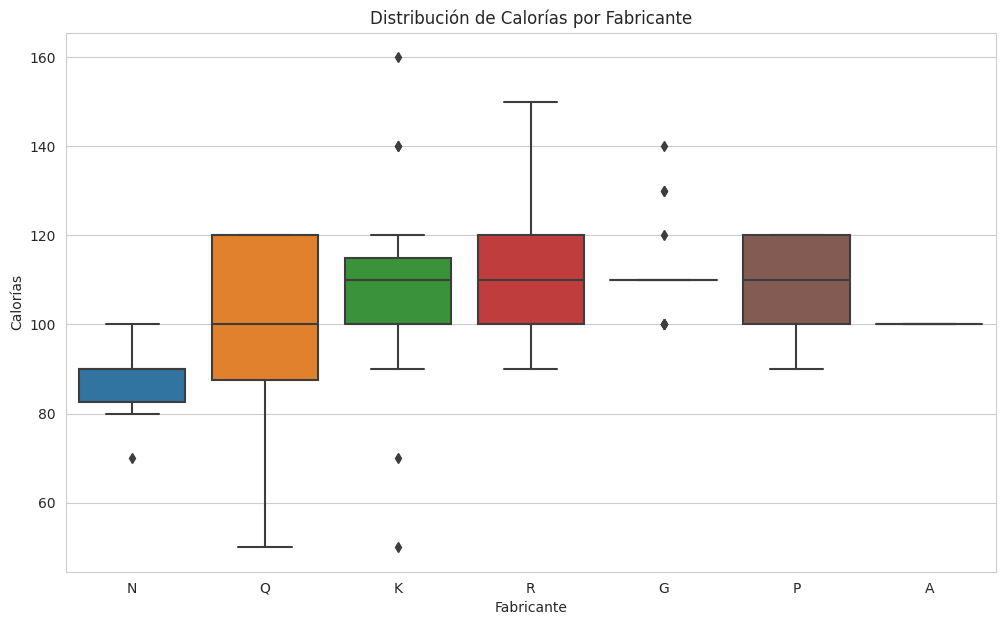

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo de Seaborn
sns.set_style("whitegrid")

# Crear el boxplot para comparar la distribución de las calorías según el fabricante
plt.figure(figsize=(12, 7))
sns.boxplot(data=cereals_df, x='mfr', y='calories')
plt.title('Distribución de Calorías por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Calorías')
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

<ipython-input-27-f9eb548b2e65>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cereals_df.corr()


Las dos variables con mayor correlación con 'rating' son: fiber, protein


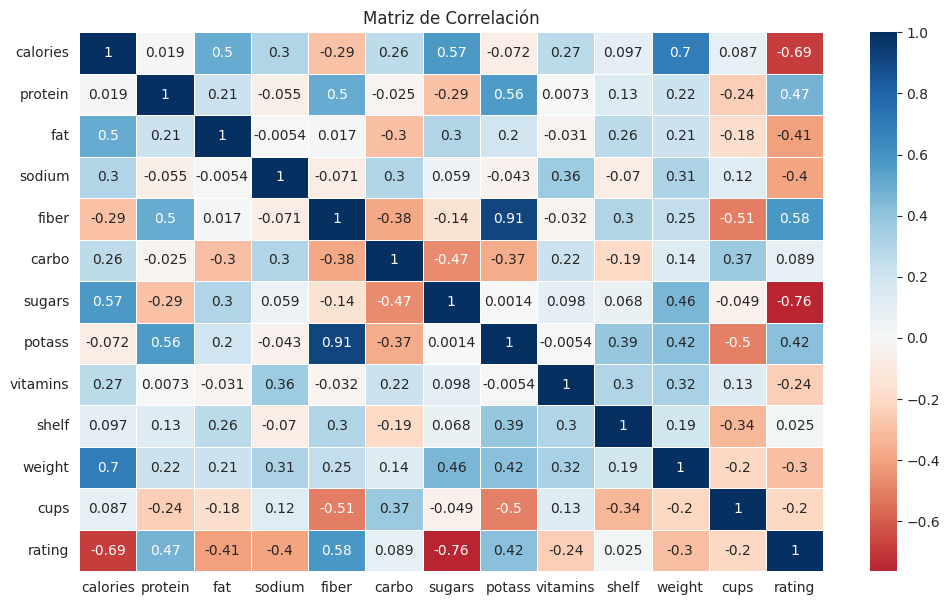

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = cereals_df.corr()

# Ordenar las correlaciones de la columna 'rating' (excluyendo la propia 'rating')
sorted_correlations = correlation_matrix['rating'].drop('rating').sort_values(ascending=False)

# Obtener las dos variables con la mayor correlación con 'rating'
top_2 = sorted_correlations.head(2)
print("Las dos variables con mayor correlación con 'rating' son:", ", ".join(top_2.index))

# Gráfico de calor de la matriz de correlación
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0, linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [ ]:
# Eliminar registros con datos faltantes
cereals_df_cleaned = cereals_df.dropna()

# Reiniciar el índice del DataFrame
cereals_df_cleaned = cereals_df_cleaned.reset_index(drop=True)

def explore_dataframe(df):
    # Información general sobre el DataFrame
    print("Información general del DataFrame:")
    print(df.info())
    print("\n" + "-"*50 + "\n")

    # Primeras filas del DataFrame
    print("Primeras filas del DataFrame:")
    print(df.head())
    print("\n" + "-"*50 + "\n")

    # Nombres de las columnas
    print("Nombres de las columnas:")
    print(df.columns)
    print("\n" + "-"*50 + "\n")

    # Tamaño del DataFrame
    print("Tamaño del DataFrame (filas, columnas):")
    print(df.shape)
    print("\n" + "-"*50 + "\n")

    # Número de valores únicos en cada columna
    print("Número de valores únicos por columna:")
    print(df.nunique())
    print("\n" + "-"*50 + "\n")

    # Verificación de valores faltantes en cada columna
    print("Cantidad de valores faltantes por columna:")
    print(df.isnull().sum())
    print("\n" + "-"*50 + "\n")

# Llamada a la función para explorar cereals_df_cleaned
explore_dataframe(cereals_df_cleaned)

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     float64
 10  potass    74 non-null     float64
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.4+ KB
None

--------------------------------------------------

Primeras filas del DataFrame:
          

# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Separar la variable de salida y los predictores numéricos
y = cereals_df_cleaned['rating']
X = cereals_df_cleaned.drop(columns=['name', 'mfr', 'type', 'rating'])  # Eliminamos las variables no numéricas y rating

# 2. Escalar los valores de X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Si deseas observar cuánta varianza se explica con cada componente principal:
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance)

# Y si deseas ver los componentes principales:
print("\nComponentes principales:\n", pca.components_)


Varianza explicada por cada componente: [0.2766149  0.22059749 0.1488355  0.08479752 0.08202324 0.05748156
 0.05498713 0.03467223 0.02614423 0.00764976 0.0046911  0.00150535]

Componentes principales:
 [[ 3.65940581e-02  3.30887657e-01  2.12548775e-01 -5.08936595e-02
   4.58623301e-01 -2.68608955e-01  8.14399579e-02  5.02603054e-01
   1.88385579e-02  3.08929353e-01  2.57160143e-01 -3.71153758e-01]
 [-5.71142024e-01  4.53671747e-02 -2.49143226e-01 -3.04684185e-01
   2.01029311e-01 -1.75660427e-01 -3.64843914e-01  7.03449944e-02
  -3.00573874e-01 -6.51144332e-02 -4.48962056e-01 -1.06552657e-01]
 [-7.79270170e-02  3.26405299e-01 -2.91274339e-01  3.43107899e-01
   1.73911820e-01  5.13002361e-01 -4.95337842e-01  1.30459589e-01
   3.27562539e-01  5.45932482e-04  1.22029586e-01  8.26947954e-02]
 [-1.64031814e-01 -2.81264931e-01 -1.24324404e-01 -1.68915569e-01
  -7.52953200e-02 -7.13054808e-02  1.60328426e-02 -1.12708399e-01
   5.94798467e-01  6.67702679e-01 -1.60396224e-01 -3.06830647e-02]
 [

7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

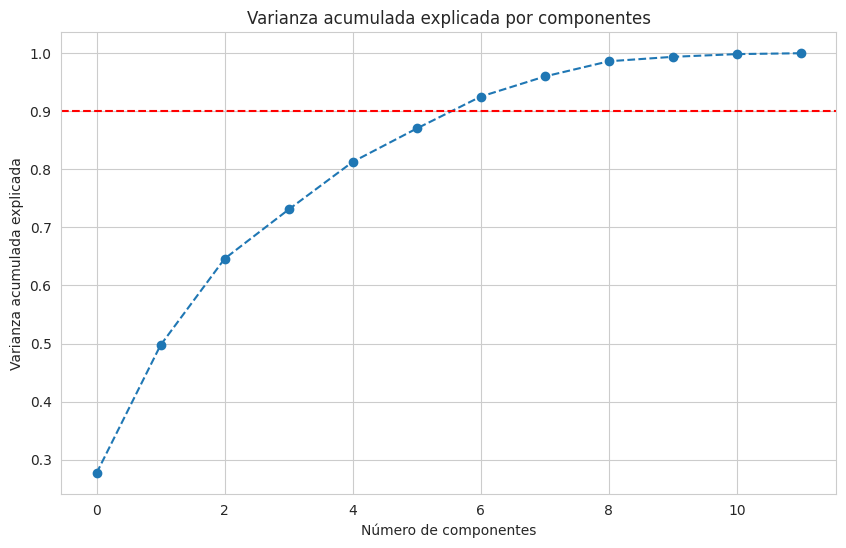

Se requieren 7 componentes principales para explicar más del 90% de la varianza.

Componentes principales seleccionados:
[[ 3.65940581e-02  3.30887657e-01  2.12548775e-01 -5.08936595e-02
   4.58623301e-01 -2.68608955e-01  8.14399579e-02  5.02603054e-01
   1.88385579e-02  3.08929353e-01  2.57160143e-01 -3.71153758e-01]
 [-5.71142024e-01  4.53671747e-02 -2.49143226e-01 -3.04684185e-01
   2.01029311e-01 -1.75660427e-01 -3.64843914e-01  7.03449944e-02
  -3.00573874e-01 -6.51144332e-02 -4.48962056e-01 -1.06552657e-01]
 [-7.79270170e-02  3.26405299e-01 -2.91274339e-01  3.43107899e-01
   1.73911820e-01  5.13002361e-01 -4.95337842e-01  1.30459589e-01
   3.27562539e-01  5.45932482e-04  1.22029586e-01  8.26947954e-02]
 [-1.64031814e-01 -2.81264931e-01 -1.24324404e-01 -1.68915569e-01
  -7.52953200e-02 -7.13054808e-02  1.60328426e-02 -1.12708399e-01
   5.94798467e-01  6.67702679e-01 -1.60396224e-01 -3.06830647e-02]
 [ 1.86667486e-01  3.72133552e-01  5.97421856e-01 -2.92344384e-01
  -2.29653302e-01

In [ ]:
# Calculando la varianza acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Graficando la curva de varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza acumulada explicada por componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.show()

# Determinando el número de componentes que explican más del 90% de la varianza
num_components = np.where(cumulative_variance > 0.9)[0][0] + 1  # Sumamos 1 porque los índices comienzan en 0
print(f"Se requieren {num_components} componentes principales para explicar más del 90% de la varianza.")

# Imprimiendo la información de dichos componentes
print("\nComponentes principales seleccionados:")
print(pca.components_[:num_components])


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [ ]:
# Obtener los coeficientes del primer componente
first_component = pca.components_[0]

# Ordenar los coeficientes en términos de magnitud (valor absoluto) y obtener los índices
sorted_indices = np.argsort(np.abs(first_component))[::-1]

# Mostrar las tres variables más importantes
top_variables = X.columns[sorted_indices[:3]]
print(f"Las tres variables más importantes para el primer componente son: {', '.join(top_variables)}")


Las tres variables más importantes para el primer componente son: potass, fiber, cups


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

In [ ]:
# Aplicar One-Hot Encoding a 'mfr' y 'type'
cereals_encoded = pd.get_dummies(cereals_df_cleaned, columns=['mfr', 'type'], drop_first=True)

print(cereals_encoded.head())

                        name  calories  protein  fat  sodium  fiber  carbo  \
0                  100%_Bran        70        4    1     130   10.0    5.0   
1          100%_Natural_Bran       120        3    5      15    2.0    8.0   
2                   All-Bran        70        4    1     260    9.0    7.0   
3  All-Bran_with_Extra_Fiber        50        4    0     140   14.0    8.0   
4    Apple_Cinnamon_Cheerios       110        2    2     180    1.5   10.5   

   sugars  potass  vitamins  ...  weight  cups     rating  mfr_G  mfr_K  \
0     6.0   280.0        25  ...     1.0  0.33  68.402973      0      0   
1     8.0   135.0         0  ...     1.0  1.00  33.983679      0      0   
2     5.0   320.0        25  ...     1.0  0.33  59.425505      0      1   
3     0.0   330.0        25  ...     1.0  0.50  93.704912      0      1   
4    10.0    70.0        25  ...     1.0  0.75  29.509541      1      0   

   mfr_N  mfr_P  mfr_Q  mfr_R  type_H  
0      1      0      0      0       0  


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [ ]:
# Proyectar los datos en los componentes seleccionados
X_projected = pca.transform(X_scaled)
X_projected = X_projected[:, :num_components]

# Crear un DataFrame para los datos proyectados
projected_df = pd.DataFrame(X_projected, columns=[f'PC{i+1}' for i in range(num_components)])

# Unir los datos proyectados, las transformaciones de las variables categóricas y la variable de salida
final_df = pd.concat([projected_df, cereals_encoded.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

# Guardar el DataFrame resultante en un archivo
final_df.to_csv("final_cereals_data.csv", index=False)
print("El DataFrame resultante ha sido almacenado en 'final_cereals_data.csv'")


El DataFrame resultante ha sido almacenado en 'final_cereals_data.csv'


In [ ]:
final_cereals_data = pd.read_csv('final_cereals_data.csv')
final_cereals_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,name,calories,protein,...,cups,rating,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H,rating.1
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,-0.235388,100%_Bran,70,4,...,0.33,68.402973,0,0,1,0,0,0,0,68.402973
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.489640,100%_Natural_Bran,120,3,...,1.00,33.983679,0,0,0,0,1,0,0,33.983679
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,-1.210340,All-Bran,70,4,...,0.33,59.425505,0,1,0,0,0,0,0,59.425505
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.289695,All-Bran_with_Extra_Fiber,50,4,...,0.50,93.704912,0,1,0,0,0,0,0,93.704912
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,-0.493652,Apple_Cinnamon_Cheerios,110,2,...,0.75,29.509541,1,0,0,0,0,0,0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,-0.475067,1.161330,0.495373,0.749484,-0.773891,-1.520184,Triples,110,2,...,0.75,39.106174,1,0,0,0,0,0,0,39.106174
70,-1.595568,-0.574653,-1.671901,0.380863,-0.489233,0.116453,0.204196,Trix,110,1,...,1.00,27.753301,1,0,0,0,0,0,0,27.753301
71,-0.134252,0.612590,1.181098,-1.357046,-0.190222,0.163728,-0.799693,Wheat_Chex,100,3,...,0.67,49.787445,0,0,0,0,0,1,0,49.787445
72,-0.674537,0.568589,1.163186,-1.330649,0.088594,0.644712,0.247744,Wheaties,100,3,...,1.00,51.592193,1,0,0,0,0,0,0,51.592193


In [ ]:
def explore_dataframe(df):
    # Información general sobre el DataFrame Final
    print("Información general del DataFrame:")
    print(df.info())
    print("\n" + "-"*50 + "\n")

    # Primeras filas del DataFrame
    print("Primeras filas del DataFrame:")
    print(df.head())
    print("\n" + "-"*50 + "\n")

    # Nombres de las columnas
    print("Nombres de las columnas:")
    print(df.columns)
    print("\n" + "-"*50 + "\n")

    # Tamaño del DataFrame
    print("Tamaño del DataFrame (filas, columnas):")
    print(df.shape)
    print("\n" + "-"*50 + "\n")

    # Número de valores únicos en cada columna
    print("Número de valores únicos por columna:")
    print(df.nunique())
    print("\n" + "-"*50 + "\n")

    # Verificación de valores faltantes en cada columna
    print("Cantidad de valores faltantes por columna:")
    print(df.isnull().sum())
    print("\n" + "-"*50 + "\n")

# Llamada a la función para explorar final_cereals_data
explore_dataframe(final_cereals_data)

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       74 non-null     float64
 1   PC2       74 non-null     float64
 2   PC3       74 non-null     float64
 3   PC4       74 non-null     float64
 4   PC5       74 non-null     float64
 5   PC6       74 non-null     float64
 6   PC7       74 non-null     float64
 7   name      74 non-null     object 
 8   calories  74 non-null     int64  
 9   protein   74 non-null     int64  
 10  fat       74 non-null     int64  
 11  sodium    74 non-null     int64  
 12  fiber     74 non-null     float64
 13  carbo     74 non-null     float64
 14  sugars    74 non-null     float64
 15  potass    74 non-null     float64
 16  vitamins  74 non-null     int64  
 17  shelf     74 non-null     int64  
 18  weight    74 non-null     float64
 19  cups      74 non-null     float64
 20 